# _**Output GEOSPACE-1D**_
    -Author: Concetta D'Amato and Riccardo Rigon
    -License: this work is licensed under a Creative Commons Attribution-NonCommercial 4.0 International License
_____ 


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as cl 
from matplotlib import rc
import matplotlib.style as style 
import math
import xarray as xr
import warnings
import plotly.graph_objects as go
import plotly.express as px
from geoframepy.timeseries import io_csv
from plotly.subplots import make_subplots


import pandas as pd
warnings.filterwarnings('ignore')
style.available
style.use('seaborn-whitegrid')
from GEOSPACE1D_Output import*

####### Plot settings #######
nice_fonts = {"legend.frameon": True, "legend.fancybox": True, "legend.facecolor": "white", "axes.edgecolor": "0.8","axes.linewidth": 0.6,"grid.linewidth":0.3,
    # Use LaTeX to write all text
    "text.usetex": False,"font.family": "Arial",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 14,"font.size": 14,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 10,"xtick.labelsize": 14,"ytick.labelsize": 14,}
plt.rcParams.update(nice_fonts)
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7fà00']

project_path = os.path.dirname(os.getcwd())

In [2]:
os.chdir(project_path+'/output/GEOSPACE')

In [3]:
lab = 'SpikePT_testconsole'

In [4]:
file_name = 'Java_'+lab+'_0000.nc'

In [5]:
ds = xr.open_dataset(file_name,engine='scipy')
ds

<xarray.Dataset>
Dimensions:                 (depth: 251, dualDepth: 251, time: 1203)
Coordinates:
  * depth                   (depth) float64 -2.495 -2.485 -2.475 ... -0.005 0.0
  * dualDepth               (dualDepth) float64 -2.5 -2.49 -2.48 ... -0.01 0.0
  * time                    (time) datetime64[ns] 2018-05-10T01:00:00 ... 201...
Data variables: (12/20)
    psi                     (time, depth) float64 ...
    psiIC                   (depth) float64 ...
    rootDensityIC           (depth) float64 ...
    Temperature             (depth) float64 ...
    theta                   (time, depth) float64 ...
    waterVolume             (time, depth) float64 ...
    ...                      ...
    StressedTs              (time, depth) float64 ...
    StressedEs              (time, depth) float64 ...
    RootDensity             (time, depth) float64 ...
    errorWaterVolume        (time) float64 ...
    runOff                  (time) float64 ...
    controlVolume           (depth) float64 ...
Attributes:
    Description_of_the_problem:         \nInitial condition hydrostatic no po...
    Top_boundary_condition:             Top Coupled
    Bottom_boundary_condition:          Bottom Free Drainage
    path_top_boundary_condition:        data/SpikeII//Prec_Irrig_Height_hourl...
    path_bottom_boundary_condition:     data/SpikeII//SpikeII_0.csv
    path_grid:                          data/Grid_NetCDF/Grid_GEOSPACE_test.nc
    time_delta:                          
    swrc_model:                         VG
    soil_hydraulic_conductivity_model:  Mualem VG no temperature
    interface_conductivity_model:       max

In [6]:
prec = io_csv.pandas_read_OMS_timeseries(project_path + '/data/SpikeII/Prec_Irrig_Height_hourly.csv',datetime_index=False)
prec.head()

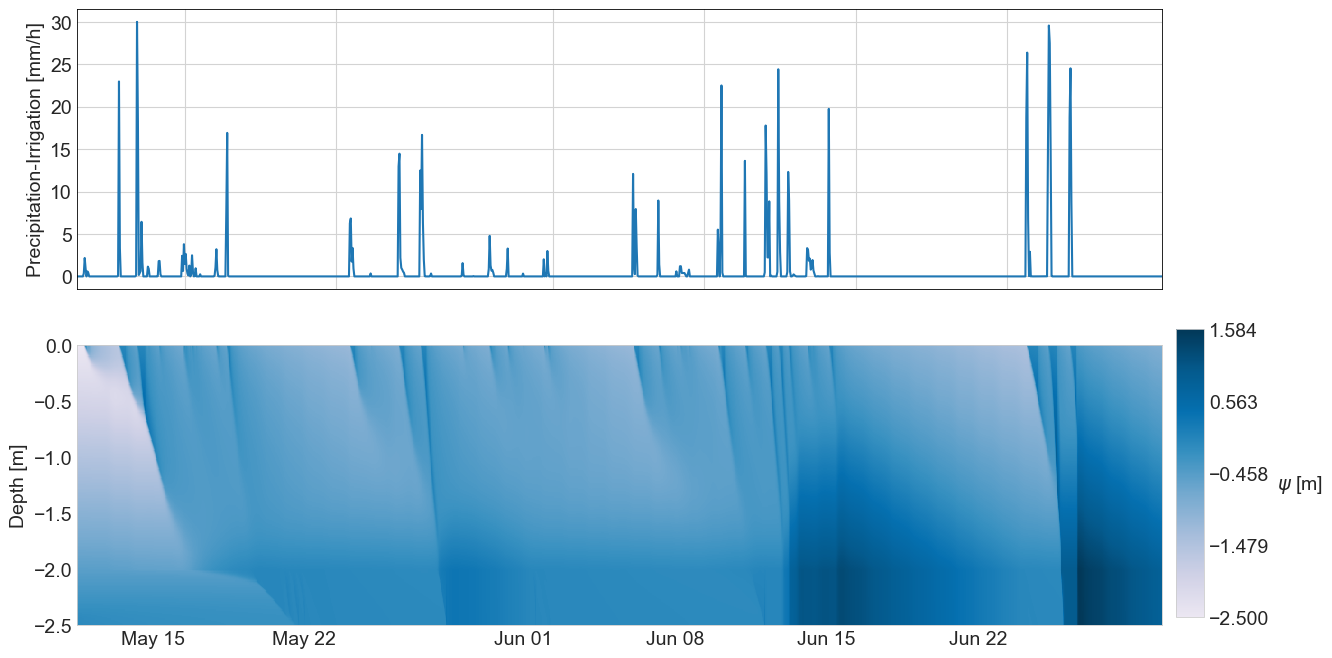

In [7]:
# Impostazioni iniziali
fig, ax = plt.subplots(2, 1, sharex='col', figsize=(1400/100, 800/100)) 
#norm = matplotlib.colors.Normalize(vmin=-40, vmax=1)
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))

# Grafico superiore
ax[0].plot(prec['Datetime'], prec['1'])
ax[0].set_ylabel('Precipitation-Irrigation [mm/h]', fontname='Arial',size=14)
ax[0].tick_params(axis='both', which='major', labelsize=14)

# Modifica dei colori della griglia del primo plot
ax[0].grid(color='lightgray', linestyle='-', linewidth=0.8)  

# Aggiunta del contorno esterno scuro al primo grafico
ax[0].spines['top'].set_color('black')
ax[0].spines['bottom'].set_color('black')
ax[0].spines['left'].set_color('black')
ax[0].spines['right'].set_color('black')

# Grafico inferiore con la color bar
a = ds.psi.plot(ax=ax[1], y='depth', add_colorbar=False, cmap=my_cmap, norm=norm)
ax[1].set_ylabel('Depth [m]', fontname='Arial',size=14)
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax[1].xaxis.set_tick_params(rotation=0)
ax[1].tick_params(axis='both', which='major', labelsize=14) 

# Aggiunta della color bar
cbar_ax = fig.add_axes([0.91, 0.12, 0.02, 0.36])
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('$\\psi$ [m]', rotation=0, labelpad=22, fontname='Arial',size=14)

# Settaggio dei valori della color bar
cbar.set_ticks([val for val in np.linspace(np.amin(ds.psi.values), np.amax(ds.psi.values), num=5)])
#cbar.set_ticks([val for val in np.linspace(-15,1, num=5)])
cbar.ax.tick_params(labelsize=14) 

# Salva l'immagine
#plt.savefig('Prec_psi_Baseline.png', dpi=300, bbox_inches='tight')  # Imposta il nome desiderato per l'immagine e regola dpi e bbox se necessario


plt.show()


In [8]:
vmin=np.amin(ds.psi.values)
vmin

-2.5001052956155343

In [9]:
root_depth = -2.0
#evaporation_layer_depth = -0.2

In [10]:
myDepth = [-0.10,-0.50,-1.00,-1.50,-2,-2.5]
myDate = ['2018-05-10 01:00','2018-05-15 01:00','2018-05-20 01:00','2018-05-30 01:00','2018-06-10 01:00','2018-06-20 01:00','2018-06-29 02:00']

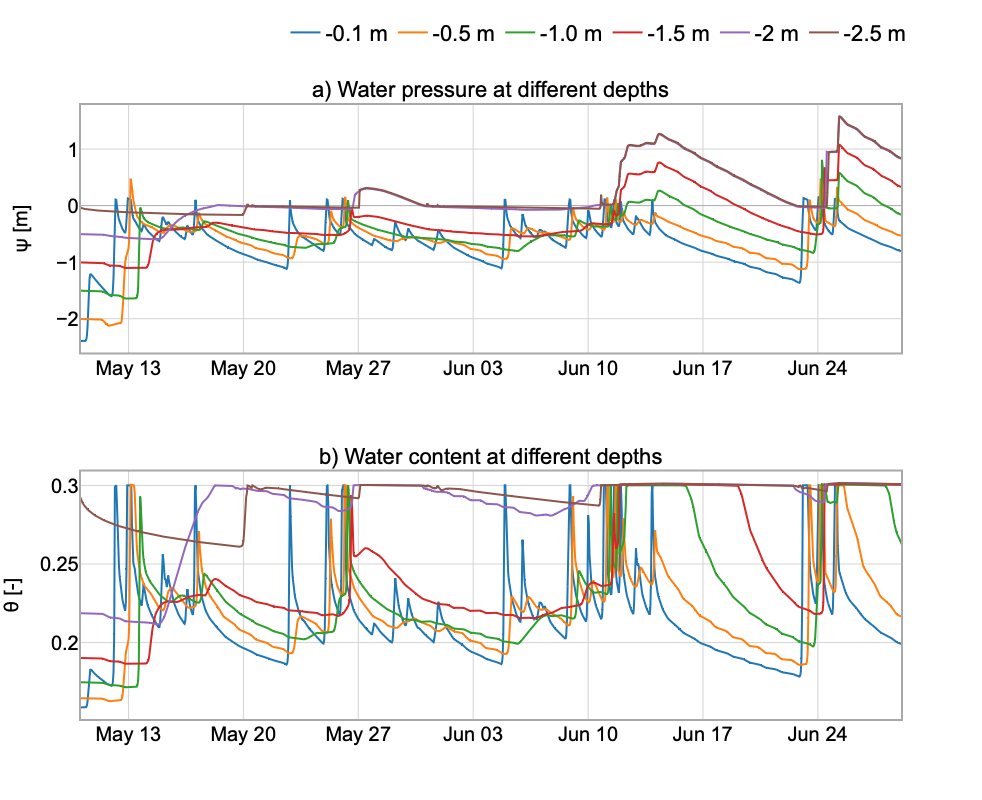

In [11]:
colorblind= ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

# Creare subplot con dimensioni personalizzate
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    subplot_titles=['a) Water pressure at different depths', 'b) Water content at different depths'],
                    row_heights=[0.5, 0.5],
                    vertical_spacing=0.19)

# Imposta la dimensione del testo dei titoli delle subplot
for i in range(1, 3):
    fig.layout.annotations[i-1].update(font=dict(size=22))

# Subplot a
for i in range(len(myDepth)):
    fig.add_trace(go.Scatter(x=ds.time, y=ds.psi.sel(depth=myDepth[i], method='nearest'), name=str(myDepth[i])+' m',line=dict(width=2,color=colorblind[i])), row=1, col=1)


# Subplot b
for i in range(len(myDepth)):
    fig.add_trace(go.Scatter(x=ds.time, y=ds.theta.sel(depth=myDepth[i], method='nearest'),showlegend=False,line=dict(width=2,color=colorblind[i])), row=2, col=1)

# Aggiornare il layout del grafico
fig.update_layout(
    height=800, width=1300,
    font_family="Arial",
    font_color="Black",
    title_font_family="Arial",
    title_font_color="Black",
    font=dict(size=22),
    plot_bgcolor="white",
    legend=dict(orientation='h', y=1.15, x=0.25),
)

# Subplot a
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', row=1, col=1, zeroline=True, 
                 zerolinecolor="darkgray", zerolinewidth=1, showticklabels=True,tickfont=dict(size=20), tickformat='%b %d')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', row=1, col=1, zeroline=True, 
                 zerolinecolor="darkgray", zerolinewidth=1, title={"text": 'ψ [m]', "font": {"size": 20, "family": "Arial"}}, tickangle=0,tickfont=dict(size=20))

# Subplot b
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', row=2, col=1, zeroline=True, 
                 zerolinecolor="darkgray", zerolinewidth=1, showticklabels=True,tickfont=dict(size=20), tickformat='%b %d')


fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', row=2, col=1, zeroline=True, 
                 zerolinecolor="darkgray", zerolinewidth=1, title={"text": 'θ [-]', "font": {"size": 20, "family": "Arial"}},tickangle=0,tickfont=dict(size=20))

fig.add_shape(type="rect",xref="paper",yref="paper",x0=fig['layout']['xaxis']['domain'][0],y0=fig['layout']['yaxis']['domain'][0],x1=fig['layout']['xaxis']['domain'][1],y1=fig['layout']['yaxis']['domain'][1],line=dict(color="darkgray", width=2))
fig.add_shape(type="rect",xref="paper",yref="paper",x0=fig['layout']['xaxis2']['domain'][0],y0=fig['layout']['yaxis2']['domain'][0],x1=fig['layout']['xaxis2']['domain'][1],y1=fig['layout']['yaxis2']['domain'][1],line=dict(color="darkgray", width=2))


fig.show()


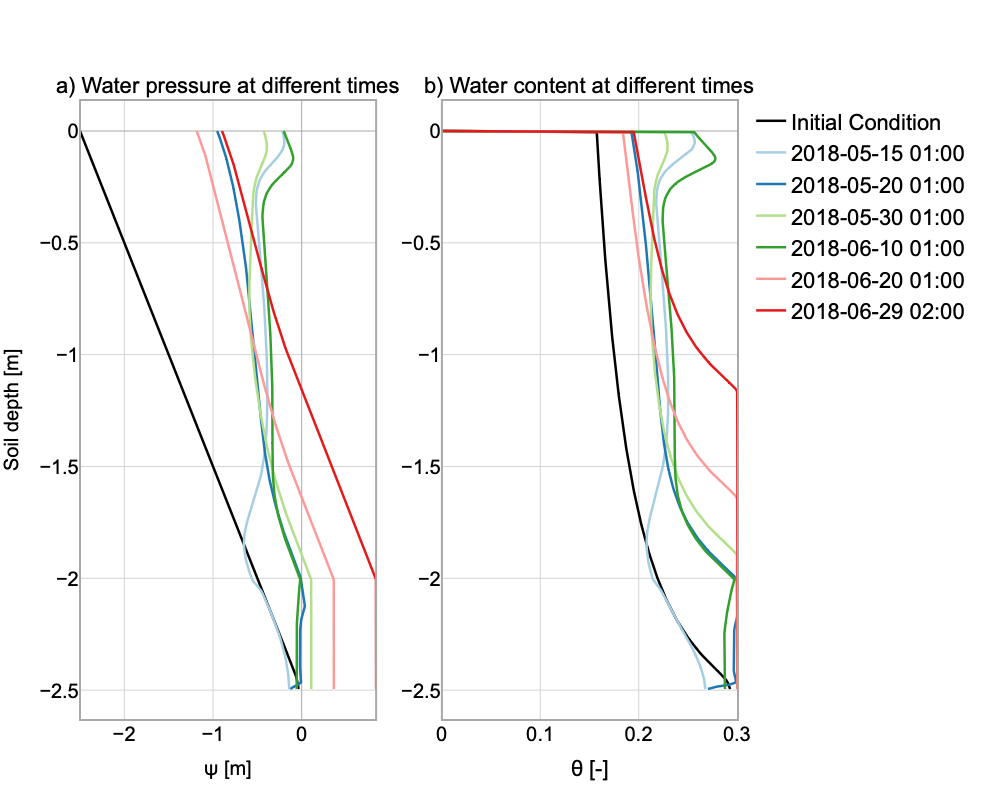

In [12]:
# Creare subplot con dimensioni personalizzate
fig = make_subplots(rows=1, cols=2, shared_yaxes=True,
                    subplot_titles=['a) Water pressure at different times', 'b) Water content at different times'],
                    column_widths=[0.5, 0.5],
                    horizontal_spacing=0.1)

# Imposta la dimensione del testo dei titoli delle subplot
for i in range(1, 3):
    fig.layout.annotations[i-1].update(font=dict(size=22))

# Subplot a

fig.add_trace(go.Scatter(x=ds.psi.sel(time=myDate[0]), y=ds.depth.values[:] ,name='Initial Condition',line=dict(width=2.5,color='black')), row=1, col=1)              
for i in range(1, len(myDate)):
    fig.add_trace(go.Scatter(x=ds.psi.sel(time=myDate[i]), y=ds.depth.values[:] ,name=str(myDate[i]),line=dict(width=2.5,color=colors[i-1])), row=1, col=1)
    

    
# Subplot b
fig.add_trace(go.Scatter(x=ds.theta.sel(time=myDate[0]), y=ds.depth.values[:] ,name=str(myDate[i]), showlegend=False, line=dict(width=2.5,color='black')), row=1, col=2)
for i in range(1, len(myDate)):
    fig.add_trace(go.Scatter(x=ds.theta.sel(time=myDate[i]), y=ds.depth.values[:] ,name=str(myDate[i]), showlegend=False, line=dict(width=2.5,color=colors[i-1])), row=1, col=2)
    
    
# Aggiornare il layout del grafico
fig.update_layout(
    height=800, width=1400,
    font_family="Arial",
    font_color="Black",
    title_font_family="Arial",
    title_font_color="Black",
    font=dict(size=22),
    plot_bgcolor="white",
    #legend=dict(orientation='h', y=1.15, x=0.2),
)



## Subplot a
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', row=1, col=1, zeroline=True,zerolinecolor="darkgray", zerolinewidth=1, showticklabels=True, tickfont=dict(size=20),title={"text": 'ψ [m]', "font": {"size": 20, "family": "Arial"}})

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', row=1, col=1, zeroline=True, zerolinecolor="darkgray", zerolinewidth=1, showticklabels=True, tickfont=dict(size=20),title={"text": 'Soil depth [m]', "font": {"size": 20, "family": "Arial"}})

# Subplot b
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', row=1, col=2, zeroline=True,zerolinecolor="darkgray", zerolinewidth=1, showticklabels=True, tickfont=dict(size=20),title={"text": 'θ [-]', "font": {"size": 22, "family": "Arial"}})

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', row=1, col=2, zeroline=True,zerolinecolor="darkgray", zerolinewidth=1, showticklabels=True, tickfont=dict(size=20))

fig.add_shape(type="rect",xref="paper",yref="paper",x0=fig['layout']['xaxis']['domain'][0],y0=fig['layout']['yaxis']['domain'][0],x1=fig['layout']['xaxis']['domain'][1],y1=fig['layout']['yaxis']['domain'][1],line=dict(color="darkgray", width=2))
fig.add_shape(type="rect",xref="paper",yref="paper",x0=fig['layout']['xaxis2']['domain'][0],y0=fig['layout']['yaxis2']['domain'][0],x1=fig['layout']['xaxis2']['domain'][1],y1=fig['layout']['yaxis2']['domain'][1],line=dict(color="darkgray", width=2))


fig.show()


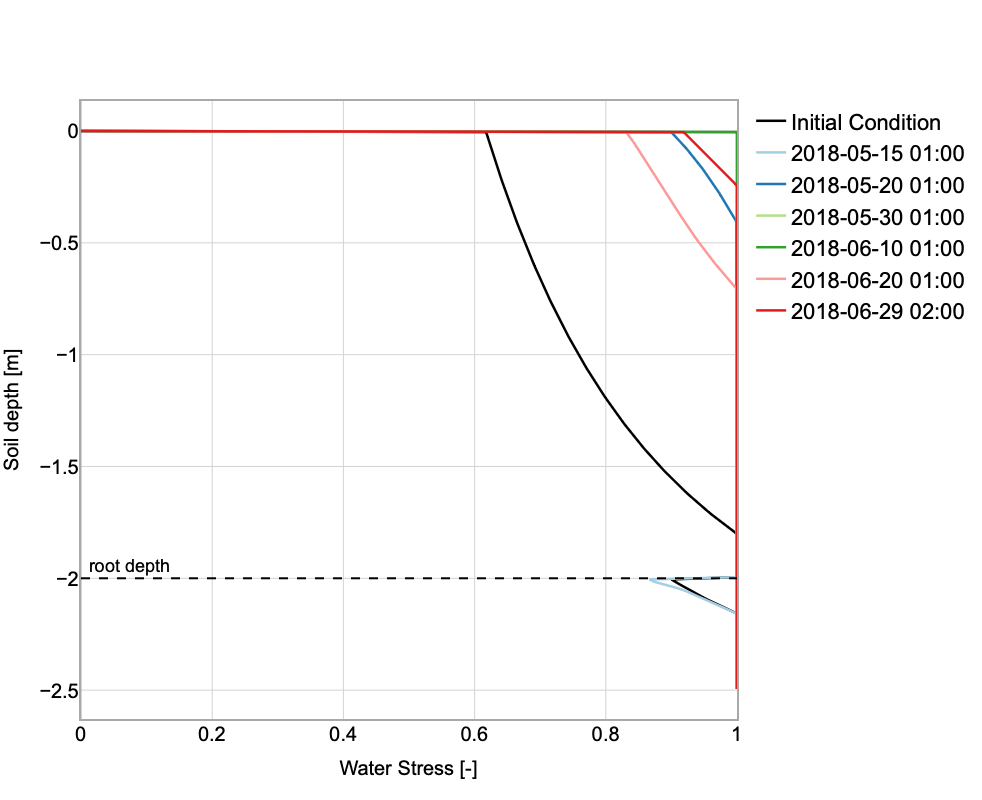

In [13]:
# Creare subplot con dimensioni personalizzate
fig = go.Figure()

# Subplot a

fig.add_trace(go.Scatter(x=ds.StressWaters.sel(time=myDate[0]), y=ds.depth.values[:] ,name='Initial Condition',line=dict(width=2.5,color='black')))              
for i in range(1, len(myDate)):
    fig.add_trace(go.Scatter(x=ds.StressWaters.sel(time=myDate[i]), y=ds.depth.values[:] ,name=str(myDate[i]),line=dict(width=2.5,color=colors[i-1])))
    
fig.add_shape(go.layout.Shape(type='line', x0=0, x1=1, y0=root_depth, y1=root_depth, line=dict(color='black', width=2, dash ='dash')))
#fig.add_shape(go.layout.Shape(type='line', x0=0, x1=1, y0=evaporation_layer_depth, y1=evaporation_layer_depth, line=dict(color='black', width=2, dash ='dashdot')))

# Adding Annotation on subplot a
#fig.add_annotation(go.layout.Annotation(text="evaporation depth", x=0.01,y=0.92,showarrow=False,xref="paper",yref="paper",font=dict(size=18)))
fig.add_annotation(go.layout.Annotation(text="root depth", x=0.01,y=0.23,showarrow=False,xref="paper",yref="paper",font=dict(size=18)))


# Aggiornare il layout del grafico
fig.update_layout(
    height=800, width=800,
    font_family="Arial",
    font_color="Black",
    title_font_family="Arial",
    title_font_color="Black",
    font=dict(size=22),
    plot_bgcolor="white",
    #legend=dict(orientation='h', y=1.15, x=0.2),
)




## Subplot 
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=True,zerolinecolor="darkgray", zerolinewidth=1, showticklabels=True, tickfont=dict(size=20),title={"text": 'Water Stress [-]', "font": {"size": 20, "family": "Arial"}})

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=True, zerolinecolor="darkgray", zerolinewidth=1, showticklabels=True, tickfont=dict(size=20),title={"text": 'Soil depth [m]', "font": {"size": 20, "family": "Arial"}})


fig.add_shape(type="rect", xref="paper", yref="paper", x0=0, y0=0, x1=1, y1=1, line=dict(color="darkgray", width=2))

fig.show()


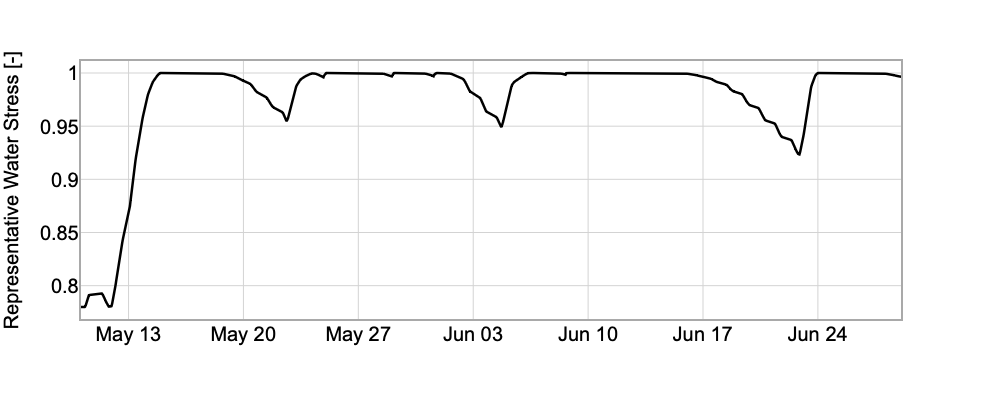

In [14]:
fig = px.line()
fig.add_trace(go.Scatter(y=ds.StressWater, x=ds.time.values[:], mode='lines',line=dict(color="black", width=2.5)))

fig.update_layout(
    height=400, width=1200,
    title='',
    #xaxis_title="Date"
    font_family="Arial",
    font_color="Black",
    title_font_family="Arial",
    title_font_color="Black",
    yaxis_title="[-]",
    #legend_title="Date",
    font=dict(size=16),
    legend=dict(yanchor="top", y=0.99, xanchor="right", x=0.99, title=""),
    plot_bgcolor="white",
)
fig.add_shape(type="rect", xref="paper", yref="paper", x0=fig['layout']['xaxis']['domain'][0], y0=fig['layout']['yaxis']['domain'][0], x1=fig['layout']['xaxis']['domain'][1], y1=fig['layout']['yaxis']['domain'][1], line=dict(color="darkgray", width=2))
fig.update_yaxes(title={"text": 'Representative Water Stress [-]', "font": {"size": 20, "family": "Arial"}},showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=True, zerolinecolor="darkgray", zerolinewidth=1,tickfont=dict(size=20))
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=True,zerolinecolor="darkgray", zerolinewidth=1, showticklabels=True,tickfont=dict(size=20), tickformat='%b %d')
fig.show()

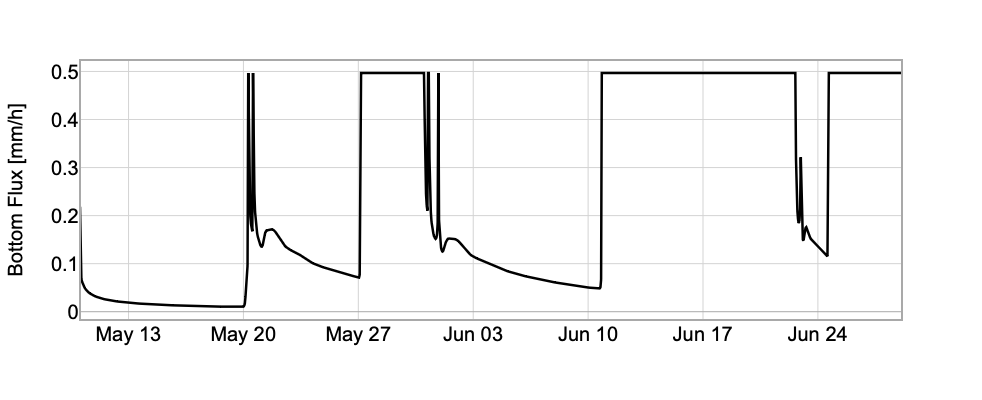

In [15]:
fig = px.line()
fig.add_trace(go.Scatter(y=ds.darcyVelocity.sel(dualDepth=ds.dualDepth[0], time=ds.time.values[:]).values*-3600000, x=ds.time.values[:], mode='lines',line=dict(color="black", width=2.5)))

fig.update_layout(
    height=400, width=1200,
    title='',
    #xaxis_title="Date"
    font_family="Arial",
    font_color="Black",
    title_font_family="Arial",
    title_font_color="Black",
    yaxis_title="",
    #legend_title="Date",
    font=dict(size=16),
    legend=dict(yanchor="top", y=0.99, xanchor="right", x=0.99, title=""),
    plot_bgcolor="white",
)
fig.add_shape(type="rect", xref="paper", yref="paper", x0=fig['layout']['xaxis']['domain'][0], y0=fig['layout']['yaxis']['domain'][0], x1=fig['layout']['xaxis']['domain'][1], y1=fig['layout']['yaxis']['domain'][1], line=dict(color="darkgray", width=2))
fig.update_yaxes(title={"text": 'Bottom Flux [mm/h]', "font": {"size": 20, "family": "Arial"}},showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=True, zerolinecolor="darkgray", zerolinewidth=1,tickfont=dict(size=20))
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=True,zerolinecolor="darkgray", zerolinewidth=1, showticklabels=True,tickfont=dict(size=20), tickformat='%b %d')
fig.show()


# Plot Evapotranspiration

In [16]:
os.chdir(project_path+'/output/GEOSPACE')


In [17]:
dfET = pd.read_csv('EvapoTranspiration_'+lab+'.csv',skiprows=6,parse_dates=[1])
dfET = dfET.drop(['Format'],axis=1) 
dfET.columns = ['Datetime','ET_sim']

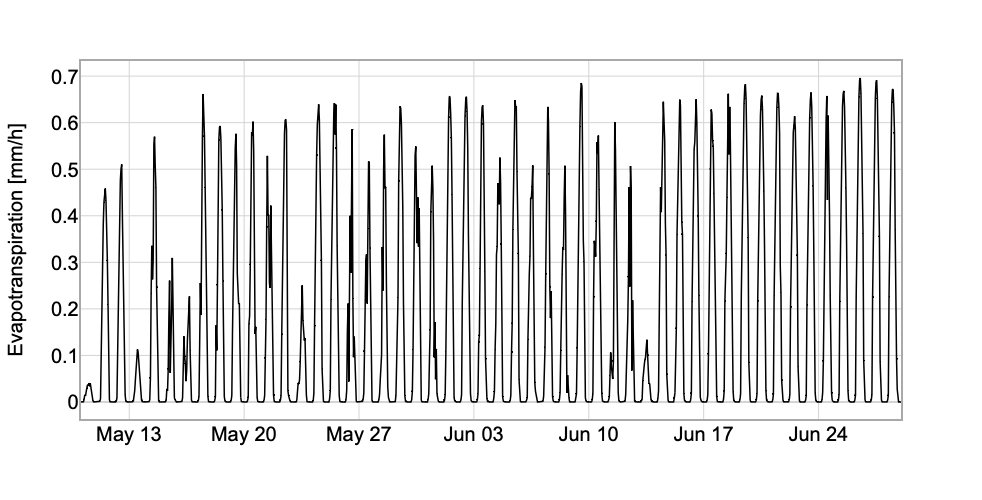

In [18]:
fig = px.line()
fig.add_trace(go.Scatter(x=dfET['Datetime'], y=dfET['ET_sim'], mode='lines',line=dict(color="black", width=1.5)))


fig.update_layout(
    height=500, width=1400,
    title='',
    #xaxis_title="Date"
    font_family="Arial",
    font_color="Black",
    title_font_family="Arial",
    title_font_color="Black",
    #legend_title="Date",
    font=dict(size=20),
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01, title=""),
    plot_bgcolor="white",
)
fig.add_shape(type="rect", xref="paper", yref="paper", x0=fig['layout']['xaxis']['domain'][0], y0=fig['layout']['yaxis']['domain'][0], x1=fig['layout']['xaxis']['domain'][1], y1=fig['layout']['yaxis']['domain'][1], line=dict(color="darkgray", width=2))
fig.update_yaxes(title={"text": 'Evapotranspiration [mm/h]', "font": {"size": 20, "family": "Arial"}},showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=True, zerolinecolor="darkgray", zerolinewidth=1,tickfont=dict(size=20))
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=True,zerolinecolor="darkgray", zerolinewidth=1, showticklabels=True,tickfont=dict(size=20), tickformat='%b %d')
fig.show()

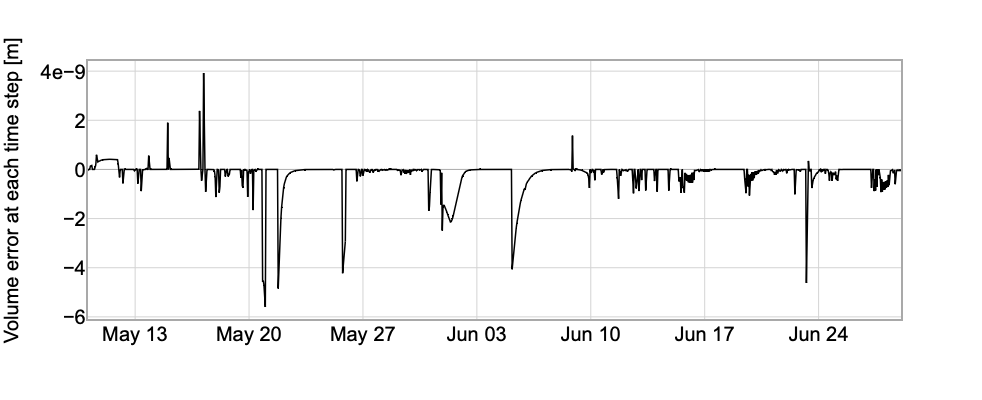

In [19]:
# Creare il grafico
fig = px.line()
fig.add_trace(go.Scatter(y=ds.errorWaterVolume, x=ds.time.values[:], mode='lines',line=dict(color="black", width=1.5)))

# Aggiornare il layout del grafico
fig.update_layout(
    height=400, width=1200,
    title='',
    font_family="Arial",
    font_color="Black",
    title_font_family="Arial",
    title_font_color="Black",
    yaxis_title="",
    font=dict(size=18),
    legend=dict(yanchor="top", y=0.99, xanchor="right", x=0.99, title=""),
    plot_bgcolor="white",
)

# Aggiungere una forma
fig.add_shape(type="rect", xref="paper", yref="paper", x0=fig['layout']['xaxis']['domain'][0], y0=fig['layout']['yaxis']['domain'][0], x1=fig['layout']['xaxis']['domain'][1], y1=fig['layout']['yaxis']['domain'][1], line=dict(color="darkgray", width=2))

# Aggiornare l'aspetto dell'asse y
fig.update_yaxes(title={"text": 'Volume error at each time step [m]', "font": {"size": 20, "family": "Arial"}},showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=True, zerolinecolor="darkgray", zerolinewidth=1, tickfont=dict(size=20), showexponent='last', exponentformat='e')

# Aggiornare l'aspetto dell'asse x
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=True, zerolinecolor="darkgray", zerolinewidth=1, showticklabels=True, tickfont=dict(size=20), tickformat='%b %d')

# Mostrare il grafico
fig.show()
